## Historical Analysis Versioned Datasets
---

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [4]:
!ls data/Input/

kegg-drug.ttl         metricts-tracking.csv


In [8]:
df_metrics = pd.read_csv('data/Input/metricts-tracking.csv', sep=';')

In [10]:
df_metrics.head()

,id,dataset,test-execution,succeeded,failed,violation-instances,violation-type,version-number
0,1,https://biosharing.org/biodbcore-000037,10,214,"31,63",3157,contains-literal,1
1,2,https://biosharing.org/biodbcore-000081,7,281,"36,23",2992,contains-literal,1
2,3,https://biosharing.org/biodbcore-000095,4,232,"34,57",3310,contains-literal,1
3,4,https://biosharing.org/biodbcore-000104,8,183,"27,81",3027,contains-literal,1
4,5,https://biosharing.org/biodbcore-000137,8,252,"18,85",3513,different-domain,1


In [14]:
df_metrics.groupby('violation-type').mean()[['violation-instances','version-number']].transpose()

violation-type,contains-literal,different-domain,onto-not-match
violation-instances,2479.125000,2254.606557,2335.093333
version-number,4.953125,6.032787,5.800000


In [24]:
datasets = df_metrics['dataset'].unique()

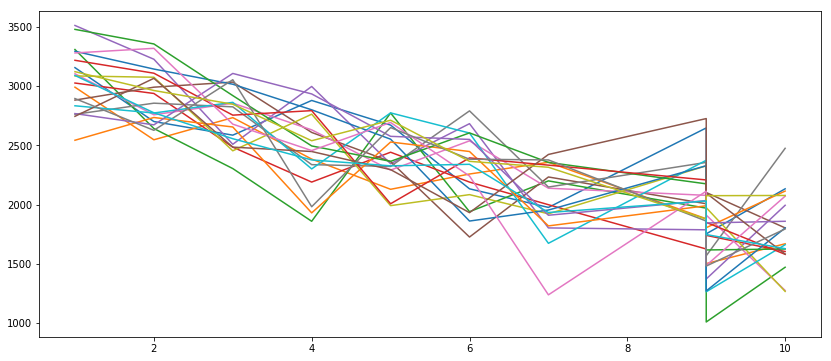

In [27]:
plt.figure(figsize=[14, 6])
for i in datasets:
    df_uniq = df_metrics[df_metrics['dataset'] == str(i)]
    plt.plot(df_uniq['version-number'], df_uniq['violation-instances'])

In [36]:
trace0 = go.Scatter(
    x = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000037']['version-number'],
    y = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000037']['violation-instances'],
    mode = 'lines+markers',
    name = '1'
)
trace1 = go.Scatter(
    x = df_metrics[df_metrics['dataset'] == 'ttps://biosharing.org/biodbcore-000081']['version-number'],
    y = df_metrics[df_metrics['dataset'] == 'ttps://biosharing.org/biodbcore-000081']['violation-instances'],
    mode = 'lines+markers',
    name = '2'
)
trace2 = go.Scatter(
    x = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000095']['version-number'],
    y = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000095']['violation-instances'],
    mode = 'lines+markers',
    name = '3'
)
data = [trace0, trace1, trace2]

py.iplot(data, filename='line-mode')